# Block #7: Turning images into data #

**How can we classify objects based on image descriptors?**

In this session, we'll classify medieval axes using geometric descriptors.

<img src="./img/axes.jpeg" width="600" height="300">

**Topics covered in this session include:**
- Image segmentation using SAM (segmeng anything model)
- Handcrafted feature extraction 
- Handcrafted feature extraction with Scikit-Image

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import glob
import os

# Image path
data_path = './axes/'
# Data loading. Lets take one image.


## How can we segment objects from an image? ##

[OPTIONAL EXCERCISE]: Segment your own images.

A recent, interactive resource for image segmentation is the open tool from Meta, SAM (Segment Anything Model).
You can try SAM out using the demo: https://segment-anything.com/demo

However, to make our lifes easier, we can integrate SAM into Python in order to annotate our data. For doing so, you can load the script 
'segment_with_sam.py' in your local Python IDE (e.g. Pycharm). Afterwards, download the model checkpoint 'vit-h' from SAM repo 
(https://github.com/facebookresearch/segment-anything?tab=readme-ov-file#model-checkpoints) and change the 'sam_checkpoint' path
in 'segment_with_sam.py'. Update, also, 'path_to_images', by pointing to use your own data. 

We are ready to run SAM and annotate our images by clicking to the objects of interest!

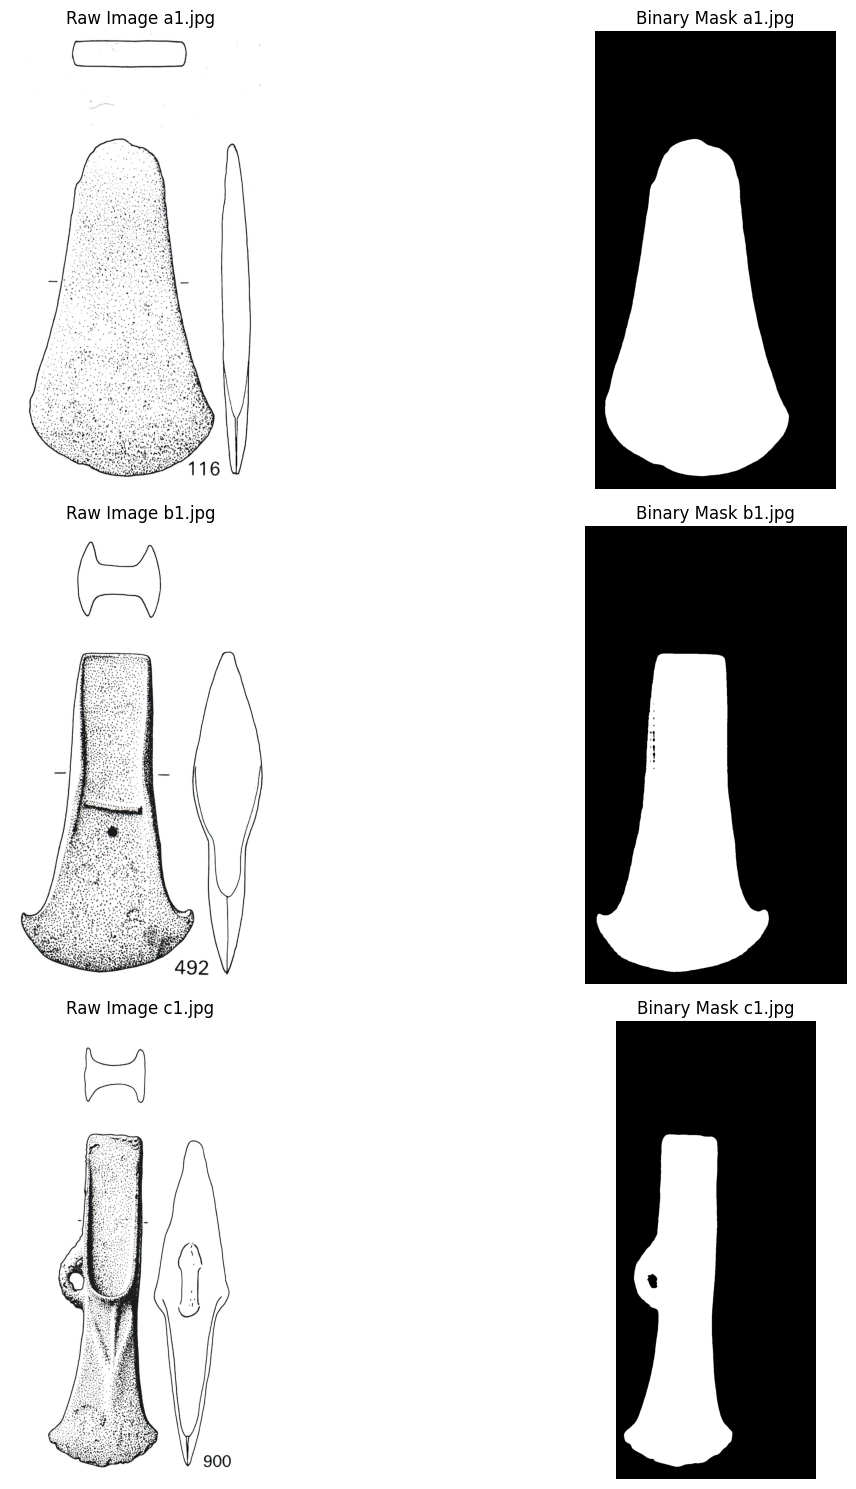

In [2]:
''' Our database includes three types of axes. We have segmented their lateral views using the provided SAM script.
    Lets visualize one image from each class, together with their segmentation masks.
''' 

import os
import cv2
import matplotlib.pyplot as plt

# Get list of image files to plot
image_files = ['a1.jpg', 'b1.jpg', 'c1.jpg']

# Plot the specified images and their binary masks
plt.figure(figsize=(15, 5*len(image_files)))

for i, image_name in enumerate(image_files):
    # Load raw image
    raw_image_path = os.path.join(data_path, image_name)
    raw_image = cv2.imread(raw_image_path)
    raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

    # Load binary mask
    mask_path = os.path.join(data_path, 'labels', image_name)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Plot raw image
    plt.subplot(len(image_files), 2, 2*i+1)
    plt.imshow(raw_image)
    plt.title(f"Raw Image {image_name}")
    plt.axis("off")

    # Plot binary mask
    plt.subplot(len(image_files), 2, 2*i+2)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Binary Mask {image_name}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [3]:
''' What is the height of the axes? '''

import cv2
import numpy as np

def get_height(msk):
    y_cords, x_cords = np.where(binary_mask==1)
    height =  y_cords.max() - y_cords.min()
    return height, y_cords.max(), y_cords.min()

image_path = os.path.join(data_path, 'labels/a1.jpg') # lets upload a random image
binary_mask = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
msk_height, _, _ = get_height(binary_mask)
print('Height of the object is {} pixels'.format(msk_height))


Height of the object is 1343 pixels


## Handcrafted feature extraction

We want to calculate the width of the object at a given % of the element height. The height percentage should be an input to the function.

**Can you code a function that:**
1) Receives an image mask and a % input value
2) Outputs the width of the object at the given % of the element height

In [ ]:
### fill me in ###

#def calculate_weight_at_perc(mask, input_percentage):


In [4]:
''' Calculate the width of the object at a given % of the element height - Cheat sheet''' 

# # Can you create a function that calculates the width of the object at a given % of the element height ?

# def calculate_weight_at_perc(mask, input_percentage):
#     # calculate height at given perc
#     height, y_max, y_min = get_height(mask)
#     heigth_at_percentage =height*input_percentage/100
    
#     # Get the y_cordinate at which the width will be calculate
#     y_cord_at_perc = heigth_at_percentage + y_min # add the offset (y_min)
    
#     # For finding the width at the given y_cord, we can look for max/min x_cords at the given y coordinate.
#     y_cords, x_cords = np.where(mask==255)
    
#     # lets find the idx of the given y_values
#     idxs = np.where(y_cords==round(y_cord_at_perc))
#     height_at_percentage = max(x_cords[idxs]) - min(x_cords[idxs])
#     return height_at_percentage

# input_percentage = 90
# width_at_perc = calculate_weight_at_perc(binary_mask, input_percentage)
# print('Width of the object at {} %  is {} pixels'.format(input_percentage, width_at_perc))

Width of the object at 90 %  is 614 pixels


Text(0, 0.5, 'Width (in pixels)')

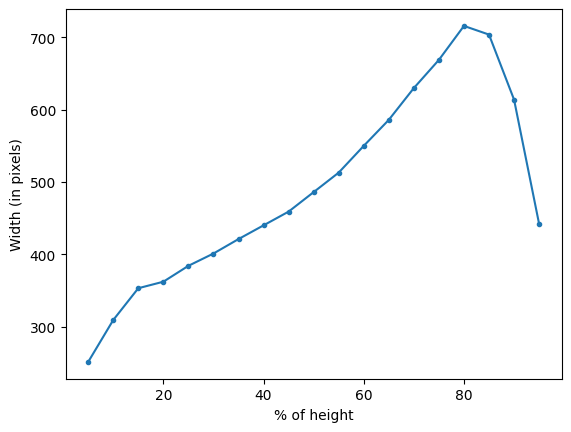

In [5]:
# How does the width vary with every 5% increment in the object's height?
# Let's plot it.

widhts_every_5_perc = []
for input_percentage in np.arange(5, 99, 5):
    widhts_every_5_perc.append(calculate_weight_at_perc(binary_mask, input_percentage))

plt.plot(np.arange(5, 99, 5), np.asarray(widhts_every_5_perc), '.-')
plt.xlabel('% of height')
plt.ylabel('Width (in pixels)')

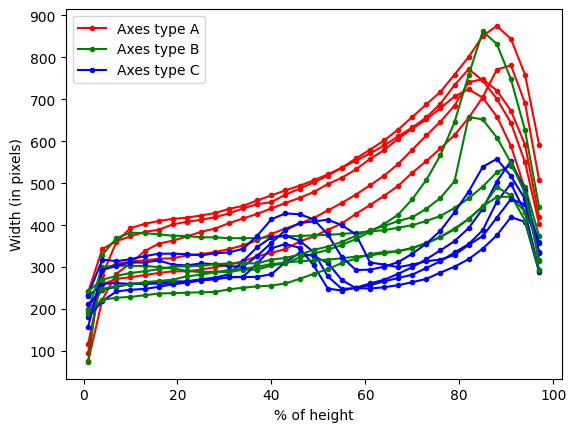

In [6]:
''' Take the previous plot as reference, and plot the width changes for the entire dataset.
    Do you see any data-pattern between different axes types?'''

import glob

# Define custom legend handles and labels with colors
legend_handles = [
    plt.Line2D([0], [0], color='red', marker='.', linestyle='-'),
    plt.Line2D([0], [0], color='green', marker='.', linestyle='-'),
    plt.Line2D([0], [0], color='blue', marker='.', linestyle='-')
]
legend_labels = ['Axes type A', 'Axes type B', 'Axes type C']

for i, image_path in enumerate(glob.glob(data_path+'labels/*')):
    binary_mask = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    widths_every_5_perc = []
    for input_percentage in np.arange(1, 99, 3):
        widths_every_5_perc.append(calculate_weight_at_perc(binary_mask, input_percentage))

    if image_path.split('/')[-1][0] == 'a':
        col = 'r'
    elif image_path.split('/')[-1][0] == 'b':
        col = 'g'
    elif image_path.split('/')[-1][0] == 'c':
        col = 'b'

    plt.plot(np.arange(1, 99, 3), np.asarray(widths_every_5_perc), '{}.-'.format(col))
    
# Add custom legend
plt.xlabel('% of height')
plt.ylabel('Width (in pixels)')
plt.legend(legend_handles, legend_labels)
plt.show()


## Handcrafted feature extraction using Scikit-Image

We want to extract geometrical descriptor from the binary masks, that help us classify between different axes types.

**You are asked to code a function that:**
1) Using the regionprops function from skimage, extract a set of descriptors from the binary mask.
2) Generate a 'pandas' database including the features extracted from each sample, with their corresponding class label (i.e. a,b, or c).
3) Can you classify the different samples using k-means algorithm? Visualize your results.

Note: Get help from ChatGPT.